In [5]:
import time
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.datasets import load_iris
# cross_val_score: 다양한 샘플링으 ㄹ해서 여러번 테스트 --> 평균치를 구해본다.!
from sklearn.metrics import *
%matplotlib inline

# 주요 라이브러리 import

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm


# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
import scipy.io as spio



In [13]:
import pyreadstat
df, meta = pyreadstat.read_sav('/Users/syshin/Desktop/Himedia/(원자료) 2019년 국민여행조사_국내여행.sav')

In [15]:
df = pd.read_csv("/Users/syshin/Desktop/Himedia/(원자료) 2019년 국민여행조사_국내여행.csv")

In [16]:
df

,Unnamed: 0,ID,Q,QQ,MON_EXP_1,MON_EXP_2,MON_EXP_3,MON_EXP_4,MON_EXP_5,MON_EXP_6,...,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10,국내_여행방문지_기타당일11,국내_여행방문지_기타당일12,국내_여행방문지_기타당일13,국내_여행방문지_기타당일14,국내_여행방문지_기타당일15,국내_여행방문지_기타당일16,국내_여행방문지_기타당일17
0,0,11010550341_1000000,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,11010550341_1000005,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,11010550341_1000007,2.0,0.0,1.0,2.0,2.0,2.0,2.0,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,11010550341_1000012,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,11010550341_1000013,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48264,48264,39020620091_1382329,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48265,48265,39020620091_1382420,0.0,0.0,2.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48266,48266,39020620091_1382421,1.0,0.0,1.0,2.0,2.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
48267,48267,39020620091_1382423,1.0,0.0,2.0,2.0,1.0,2.0,2.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.to_csv("/Users/syshin/Desktop/Himedia/(원자료) 2019년 국민여행조사_국내여행.csv")

findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumGothic'] not found. Falling back to DejaVu Sans.


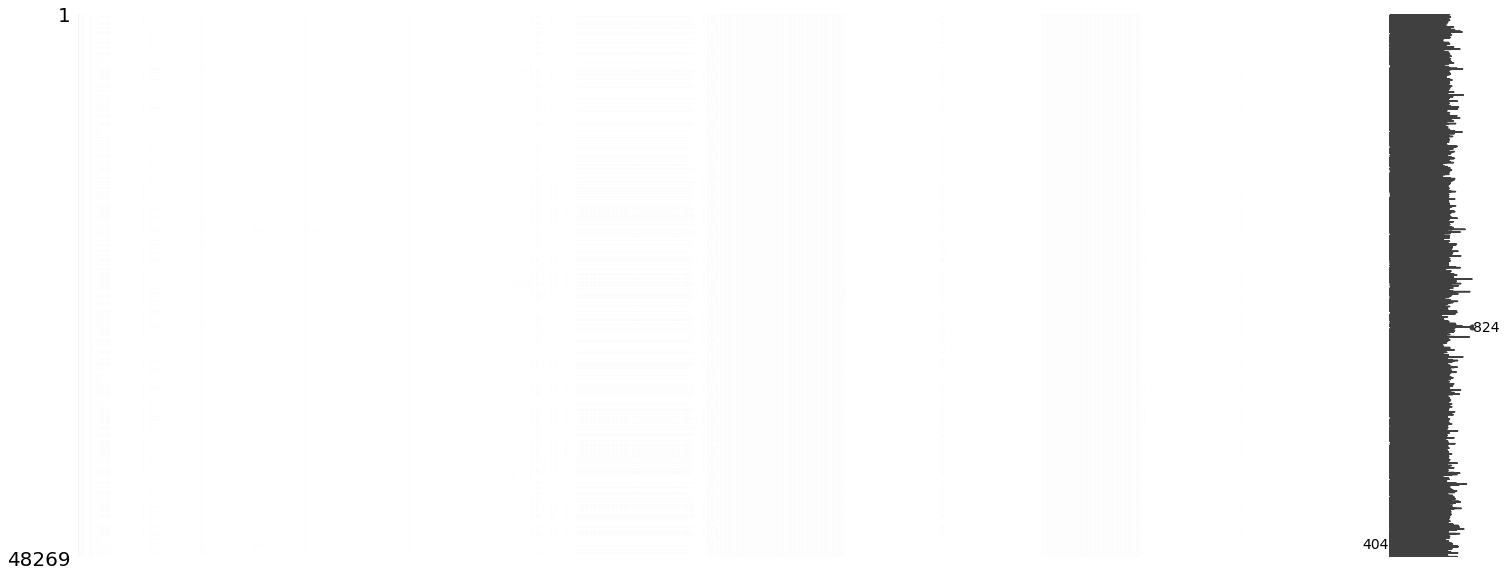

In [12]:
import missingno as msno

msno.matrix(df)
plt.show()

In [8]:
df.shape

(50710, 2107)

In [9]:
##2020 년도에 여행한 사람만 추출하기 전 확인
df.iloc[50:100,1:15][df['D_TRA1_SYEAR']==2020.0]

,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,SA1_6,D_TRA1_CHECK,D_TRA1_CASE,D_TRA1_SYEAR,D_TRA1_SMONTH,D_TRA1_SDAY,D_TRA1_EYEAR,D_TRA1_EMONTH,D_TRA1_EDAY
51,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,2020.0,5.0,2.0,2020.0,5.0,2.0
52,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,2020.0,5.0,2.0,2020.0,5.0,3.0
54,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,2020.0,5.0,9.0,2020.0,5.0,9.0
56,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,2020.0,5.0,2.0,2020.0,5.0,3.0
58,0.0,0.0,1.0,0.0,0.0,0.0,,3.0,2020.0,5.0,2.0,2020.0,5.0,2.0
61,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,2020.0,6.0,20.0,2020.0,6.0,21.0
62,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,2020.0,6.0,14.0,2020.0,6.0,14.0
64,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,2020.0,6.0,6.0,2020.0,6.0,6.0
66,0.0,0.0,1.0,0.0,0.0,0.0,,3.0,2020.0,6.0,7.0,2020.0,6.0,7.0
67,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,2020.0,6.0,5.0,2020.0,6.0,7.0


In [10]:
df['D_TRA1_SYEAR'].value_counts()

2020.0    19414
Name: D_TRA1_SYEAR, dtype: int64

In [11]:
df['D_TRA1_SYEAR'].isna().sum()

31296

In [12]:
##2020 년도에 여행한 사람만 추출
df = df[df['D_TRA1_SYEAR']==2020.0] 
df.reset_index(inplace=True)
df

,index,ID,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,SA1_6,D_TRA1_CHECK,D_TRA1_CASE,...,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10
0,2,11010530201_17,0.0,1.0,0.0,0.0,0.0,0.0,Y,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,11010530201_2,0.0,0.0,1.0,0.0,0.0,0.0,,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,5,11010530201_3,0.0,0.0,1.0,0.0,0.0,1.0,,3.0,...,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6,11010530201_35,0.0,0.0,1.0,0.0,0.0,0.0,,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,8,11010530201_8,0.0,0.0,1.0,0.0,0.0,0.0,,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19409,50622,39020590071_172926,0.0,0.0,0.0,1.0,0.0,0.0,Y,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19410,50631,39020590321_202105,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19411,50645,3902059058A_344813,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19412,50674,39020600711_345258,0.0,0.0,1.0,0.0,0.0,0.0,,3.0,...,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
## 관광/휴양 이 포함되지 않는 row 제거
df = df[(df['SA1_1']!=0) | (df['SA1_2']!=0.0) | (df['SA1_4']!=0)]

In [14]:
df[['SA1_1', 'SA1_2', 'SA1_3', 'SA1_4', 'SA1_5']].value_counts()

SA1_1  SA1_2  SA1_3  SA1_4  SA1_5
1.0    0.0    0.0    0.0    0.0      10169
0.0    1.0    0.0    0.0    0.0       3586
1.0    0.0    1.0    0.0    0.0        531
0.0    0.0    0.0    1.0    0.0        498
2.0    0.0    0.0    0.0    0.0        190
1.0    0.0    0.0    0.0    1.0        125
       1.0    0.0    0.0    0.0         81
0.0    1.0    1.0    0.0    0.0         64
       2.0    0.0    0.0    0.0         42
       1.0    0.0    0.0    1.0         33
1.0    0.0    0.0    1.0    0.0         32
0.0    0.0    1.0    1.0    0.0         18
1.0    0.0    0.0    0.0    2.0         17
0.0    0.0    0.0    2.0    0.0         16
3.0    0.0    0.0    0.0    0.0         16
2.0    0.0    1.0    0.0    0.0         13
0.0    1.0    0.0    1.0    0.0         11
1.0    0.0    2.0    0.0    0.0          9
              1.0    0.0    1.0          8
0.0    0.0    0.0    1.0    1.0          7
4.0    0.0    0.0    0.0    0.0          6
2.0    0.0    0.0    0.0    1.0          5
                    

In [15]:
## 추천도, 재방문의사 보통이상만 추출
df = df[(df['A12']>=3) & (df['A13']>=3)]
df

,index,ID,SA1_1,SA1_2,SA1_3,SA1_4,SA1_5,SA1_6,D_TRA1_CHECK,D_TRA1_CASE,...,국내_여행방문지_기타당일1,국내_여행방문지_기타당일2,국내_여행방문지_기타당일3,국내_여행방문지_기타당일4,국내_여행방문지_기타당일5,국내_여행방문지_기타당일6,국내_여행방문지_기타당일7,국내_여행방문지_기타당일8,국내_여행방문지_기타당일9,국내_여행방문지_기타당일10
0,2,11010530201_17,0.0,1.0,0.0,0.0,0.0,0.0,Y,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,9,11010530201_9,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,10,11010560051_29800,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,12,11010560051_29803,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,18,11010560051_29835,1.0,0.0,0.0,0.0,1.0,0.0,,5.0,...,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19407,50601,39020580191_142191,0.0,1.0,0.0,0.0,0.0,0.0,Y,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19408,50610,3902058033A_288916,1.0,0.0,1.0,0.0,0.0,0.0,Y,1.0,...,NaN,17.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19409,50622,39020590071_172926,0.0,0.0,0.0,1.0,0.0,0.0,Y,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
19410,50631,39020590321_202105,1.0,0.0,0.0,0.0,0.0,0.0,Y,1.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
col=df.columns

In [17]:
df['국내_여행여부'].value_counts()

1.0    15416
Name: 국내_여행여부, dtype: int64

In [18]:
df['A5_13'].value_counts()

13.0    384
Name: A5_13, dtype: int64

In [19]:
## 필요컬럼
columns_list = [
 'D_TRA1_SYEAR',
 'D_TRA1_S_Day',
 'D_TRA1_COST',
 'D_TRA1_ONE_COST',
 'D_TRA1_VAC',
 'D_TRA1_1_SMONTH',
 'D_TRA1_1_SPOT',
 'D_TRA1_1_Q6',
 'D_TRA1_2_SMONTH',
 'D_TRA1_2_SPOT',
 'D_TRA1_2_Q6',
 'D_TRA1_3_SMONTH',
 'D_TRA1_3_SPOT',
 'D_TRA1_3_Q6',
 'D_TRA1_4_SMONTH',
 'D_TRA1_4_SPOT',
 'D_TRA1_4_Q6',
 'D_TRA1_5_SMONTH',
 'D_TRA1_5_SPOT',
 'D_TRA1_5_Q6',
 'D_TRA1_6_SMONTH',
 'D_TRA1_6_SPOT',
 'D_TRA1_6_Q6',
 'D_TRA1_7_SMONTH',
 'D_TRA1_7_SPOT',
 'D_TRA1_7_Q6',
 'D_TRA1_8_SMONTH',
 'D_TRA1_8_SPOT',
 'D_TRA1_8_Q6',
 'D_TRA1_9_SMONTH',
 'D_TRA1_9_SPOT',
 'D_TRA1_9_Q6',
 'D_TRA1_10_SMONTH',
 'D_TRA1_10_SPOT',
 'D_TRA1_10_Q6',
 'D_TRA2_S_Day',
 'D_TRA2_COST',
 'D_TRA2_ONE_COST',
 'D_TRA2_VAC',
 'D_TRA2_1_SMONTH',
 'D_TRA2_1_SPOT',
 'D_TRA2_1_Q6',
 'D_TRA2_2_SMONTH',
 'D_TRA2_2_SPOT',
 'D_TRA2_2_Q6',
 'D_TRA2_3_SMONTH',
 'D_TRA2_3_SPOT',
 'D_TRA2_3_Q6',
 'D_TRA2_4_SMONTH',
 'D_TRA2_4_SPOT',
 'D_TRA2_4_Q6',
 'D_TRA2_5_SMONTH',
 'D_TRA2_5_SPOT',
 'D_TRA2_5_Q6',
 'D_TRA2_6_SMONTH',
 'D_TRA2_6_SPOT',
 'D_TRA2_6_Q6',
 'D_TRA2_7_SMONTH',
 'D_TRA2_7_SPOT',
 'D_TRA2_7_Q6',
 'D_TRA2_8_SMONTH',
 'D_TRA2_8_SPOT',
 'D_TRA2_8_Q6',
 'D_TRA2_9_SMONTH',
 'D_TRA2_9_SPOT',
 'D_TRA2_9_Q6',
 'D_TRA2_10_SMONTH',
 'D_TRA2_10_SPOT',
 'D_TRA2_10_Q6',
 'D_TRA3_S_Day',
 'D_TRA3_COST',
 'D_TRA3_ONE_COST',
 'D_TRA3_VAC',
 'D_TRA3_1_SMONTH',
 'D_TRA3_1_SPOT',
 'D_TRA3_1_Q6',
 'D_TRA3_2_SMONTH',
 'D_TRA3_2_SPOT',
 'D_TRA3_2_Q6',
 'D_TRA3_3_SMONTH',
 'D_TRA3_3_SPOT',
 'D_TRA3_3_Q6',
 'D_TRA3_4_SMONTH',
 'D_TRA3_4_SPOT',
 'D_TRA3_4_Q6',
 'D_TRA3_5_SMONTH',
 'D_TRA3_5_SPOT',
 'D_TRA3_5_Q6',
 'D_TRA3_6_SMONTH',
 'D_TRA3_6_SPOT',
 'D_TRA3_6_Q6',
 'D_TRA3_7_SMONTH',
 'D_TRA3_7_SPOT',
 'D_TRA3_7_Q6',
 'D_TRA3_8_SMONTH',
 'D_TRA3_8_SPOT',
 'D_TRA3_8_Q6',
 'D_TRA3_9_SMONTH',
 'D_TRA3_9_SPOT',
 'D_TRA3_9_Q6',
 'D_TRA3_10_SMONTH',
 'D_TRA3_10_SPOT',
 'D_TRA3_10_Q6',
 'D_TRA4_S_Day',
 'D_TRA4_COST',
 'D_TRA4_ONE_COST',
 'D_TRA4_VAC',
 'D_TRA4_1_SMONTH',
 'D_TRA4_1_SPOT',
 'D_TRA4_1_Q6',
 'D_TRA4_2_SMONTH',
 'D_TRA4_2_SPOT',
 'D_TRA4_2_Q6',
 'D_TRA4_3_SMONTH',
 'D_TRA4_3_SPOT',
 'D_TRA4_3_Q6',
 'D_TRA4_4_SMONTH',
 'D_TRA4_4_SPOT',
 'D_TRA4_4_Q6',
 'D_TRA4_5_SMONTH',
 'D_TRA4_5_SPOT',
 'D_TRA4_5_Q6',
 'D_TRA4_6_SMONTH',
 'D_TRA4_6_SPOT',
 'D_TRA4_6_Q6',
 'D_TRA4_7_SMONTH',
 'D_TRA4_7_SPOT',
 'D_TRA4_7_Q6',
 'D_TRA4_8_SMONTH',
 'D_TRA4_8_SPOT',
 'D_TRA4_8_Q6',
 'D_TRA4_9_SMONTH',
 'D_TRA4_9_SPOT',
 'D_TRA4_9_Q6',
 'D_TRA4_10_SMONTH',
 'D_TRA4_10_SPOT',
 'D_TRA4_10_Q6',
 'D_TRA5_S_Day',
 'D_TRA5_COST',
 'D_TRA5_ONE_COST',
 'D_TRA5_VAC',
 'D_TRA5_1_SMONTH',
 'D_TRA5_1_SPOT',
 'D_TRA5_1_Q6',
 'D_TRA5_2_SMONTH',
 'D_TRA5_2_SPOT',
 'D_TRA5_2_Q6',
 'D_TRA5_3_SMONTH',
 'D_TRA5_3_SPOT',
 'D_TRA5_3_Q6',
 'D_TRA5_4_SMONTH',
 'D_TRA5_4_SPOT',
 'D_TRA5_4_Q6',
 'D_TRA5_5_SMONTH',
 'D_TRA5_5_SPOT',
 'D_TRA5_5_Q6',
 'D_TRA5_6_SMONTH',
 'D_TRA5_6_SPOT',
 'D_TRA5_6_Q6',
 'D_TRA5_7_SMONTH',
 'D_TRA5_7_SPOT',
 'D_TRA5_7_Q6',
 'D_TRA5_8_SMONTH',
 'D_TRA5_8_SPOT',
 'D_TRA5_8_Q6',
 'D_TRA5_9_SMONTH',
 'D_TRA5_9_SPOT',
 'D_TRA5_9_Q6',
 'D_TRA5_10_SMONTH',
 'D_TRA5_10_SPOT',
 'D_TRA5_10_Q6',
 'D_TRA6_S_Day',
 'D_TRA6_COST',
 'D_TRA6_ONE_COST',
 'D_TRA6_VAC',
 'D_TRA6_1_SMONTH',
 'D_TRA6_1_SPOT',
 'D_TRA6_1_Q6',
 'D_TRA6_2_SMONTH',
 'D_TRA6_2_SPOT',
 'D_TRA6_2_Q6',
 'D_TRA6_3_SMONTH',
 'D_TRA6_3_SPOT',
 'D_TRA6_3_Q6',
 'D_TRA6_4_SMONTH',
 'D_TRA6_4_SPOT',
 'D_TRA6_4_Q6',
 'D_TRA6_5_SMONTH',
 'D_TRA6_5_SPOT',
 'D_TRA6_5_Q6',
 'D_TRA6_6_SMONTH',
 'D_TRA6_6_SPOT',
 'D_TRA6_6_Q6',
 'D_TRA6_7_SMONTH',
 'D_TRA6_7_SPOT',
 'D_TRA6_7_Q6',
 'D_TRA6_8_SMONTH',
 'D_TRA6_8_SPOT',
 'D_TRA6_8_Q6',
 'D_TRA6_9_SMONTH',
 'D_TRA6_9_SPOT',
 'D_TRA6_9_Q6',
 'D_TRA6_10_SMONTH',
 'D_TRA6_10_SPOT',
 'D_TRA6_10_Q6',
 'D_TRA7_S_Day',
 'D_TRA7_COST',
 'D_TRA7_ONE_COST',
 'D_TRA7_VAC',
 'D_TRA7_1_SMONTH',
 'D_TRA7_1_SPOT',
 'D_TRA7_1_Q6',
 'D_TRA7_2_SMONTH',
 'D_TRA7_2_SPOT',
 'D_TRA7_2_Q6',
 'D_TRA7_3_SMONTH',
 'D_TRA7_3_SPOT',
 'D_TRA7_3_Q6',
 'D_TRA7_4_SMONTH',
 'D_TRA7_4_SPOT',
 'D_TRA7_4_Q6',
 'D_TRA7_5_SMONTH',
 'D_TRA7_5_SPOT',
 'D_TRA7_5_Q6',
 'D_TRA7_6_SMONTH',
 'D_TRA7_6_SPOT',
 'D_TRA7_6_Q6',
 'D_TRA7_7_SMONTH',
 'D_TRA7_7_SPOT',
 'D_TRA7_7_Q6',
 'D_TRA7_8_SMONTH',
 'D_TRA7_8_SPOT',
 'D_TRA7_8_Q6',
 'D_TRA7_9_SMONTH',
 'D_TRA7_9_SPOT',
 'D_TRA7_9_Q6',
 'D_TRA7_10_SMONTH',
 'D_TRA7_10_SPOT',
 'D_TRA7_10_Q6',
 'D_TRA8_S_Day',
 'D_TRA8_COST',
 'D_TRA8_ONE_COST',
 'D_TRA8_VAC',
 'D_TRA8_1_SMONTH',
 'D_TRA8_1_SPOT',
 'D_TRA8_1_Q6',
 'D_TRA8_2_SMONTH',
 'D_TRA8_2_SPOT',
 'D_TRA8_2_Q6',
 'D_TRA8_3_SMONTH',
 'D_TRA8_3_SPOT',
 'D_TRA8_3_Q6',
 'D_TRA8_4_SMONTH',
 'D_TRA8_4_SPOT',
 'D_TRA8_4_Q6',
 'D_TRA8_5_SMONTH',
 'D_TRA8_5_SPOT',
 'D_TRA8_5_Q6',
 'D_TRA8_6_SMONTH',
 'D_TRA8_6_SPOT',
 'D_TRA8_6_Q6',
 'D_TRA8_7_SMONTH',
 'D_TRA8_7_SPOT',
 'D_TRA8_7_Q6',
 'D_TRA8_8_SMONTH',
 'D_TRA8_8_SPOT',
 'D_TRA8_8_Q6',
 'D_TRA8_9_SMONTH',
 'D_TRA8_9_SPOT',
 'D_TRA8_9_Q6',
 'D_TRA8_10_SMONTH',
 'D_TRA8_10_SPOT',
 'D_TRA8_10_Q6',
 'A1_1',
 'A1_2',
 'A1_3',
 'A2',
 'A4_1',
 'A4_2',
 'A4_3',
 'A5_1',
 'A5_2',
 'A5_3',
 'A5_4',
 'A5_5',
 'A5_6',
 'A5_7',
 'A5_8',
 'A5_9',
 'A5_10',
 'A5_11',
 'A5_12',
 'A5_13',
 'A5_14',
 'A5_15',
 'A5_16',
 'A5_17',
 'A5_18',
 'A5_19',
 'A5_20',
 'A5_21',
 'A7',
 'A7A',
 'A7B_1',
 'A7B_2',
 'A7B_3',
 'A7B_4',
 'A7B_5',
 'A7B_6',
 'A7B_7',
'A8_TOTAL',
 'NA8_1',
 'NA8_TOTAL',
 'NA9A',
 'NA9B',
 'NA9C',
 'NA9D',
 'NA9E',
 'NA9F',
 'NA9G',
 'NA9H',
 'NA9I',
 'A9',
 'NA9',
 'A11',
 'A11A_1',
 'A11A_2',
 'A11A_3',
 'A11A_4',
 'A11A_5',
 'A11A_6',
 'A11A_7',
 'A11A_8',
 'A11A_9',
 'A11A_10',
 'A11A_11',
 'A11A_12',
 'DQ7',
 'BSEX',
 'BAGE',
 'SAGE',
 'BMON',
 'BARA',
 '국내_숙박여부',
 'WT_DOM'

]

In [20]:
df = df[columns_list]

In [21]:
len(columns_list)

345

In [22]:
# Target값 전처리

# Q5. 다녀오신 여행에서 참여하신 활동은 무엇입니까? 해당되는 항목은 모두 선택해 주십시오.
# column명: A5_1 ~ A5_21
# 전처리 전:
# 자연 및 풍경감상
# 음식관광(지역 맛집 등)
# 야외 위락 및 스포츠, 레포츠 활동
# 역사 유적지 방문
# 테마파크, 놀이시설, 동/식물원 방문
# 휴식/휴양
# 온천/스파
# 쇼핑
# 지역 문화예술/공연/전시시설 관람
# 스포츠 경기관람
# 지역 축제/이벤트참가
# 교육/체험 프로그램 참가
# 종교/성지순례
# 카지노, 경마, 경륜 등
# 시티투터
# 드라마 촬영지 방문
# 유흥/오락
# 가족/친지/친구 방문
# 회의참가/시찰
# 교육/훈련/연수
# 기타

# 전처리 후:
# 1.자연 및 풍경감상
# 2.음식관광(지역 맛집 등)
# 3.야외 위락 및 스포츠, 레포츠 활동
# 4.역사 유적지 방문                                  + 16. 드라마 촬영지 방문
# 5.테마파크, 놀이시설, 동/식물원 방문
# 6.휴식/휴양                                            + 7. 온천/스파
# 8.쇼핑                                                   + 15. 시티투어
# 9.지역 문화예술/공연/전시시설 관람         + 10.스포츠 경기관람, 11.지역 축제/이벤트참가 +12. 교육/체험 프로그램 참가
# 17.유흥/오락                                           +14.카지노, 경마, 경륜 등
# 21.기타

# 기타 추가 컬럼
# 13.종교/성지순례
# 18.가족/친지/친구 방문
# 19.회의참가/시찰
# 20.교육/훈련/연수

In [23]:
df.shape

(15416, 345)

In [25]:
df[target_rawcol].head()

NameError: name 'target_rawcol' is not defined

In [26]:
df.to_csv('2020_전처리중확인_drop.csv')

# ========================새 csv======================================

In [30]:
import time
from IPython.display import Image
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler # 표준화(평균을 기준)
from sklearn.preprocessing import MinMaxScaler # 정규화(정해진 규칙 기준, mix-max기준)
from sklearn.datasets import load_iris
# cross_val_score: 다양한 샘플링으 ㄹ해서 여러번 테스트 --> 평균치를 구해본다.!
from sklearn.metrics import *
%matplotlib inline

# 주요 라이브러리 import

from matplotlib import rc, font_manager
import matplotlib.font_manager as fm


# 디렉토리 및 파일 이름에 맞추어 변경
font_location = '../NanumGothic.ttf'
font_name = fm.FontProperties(fname=font_location).get_name()
rc('font', family=font_name)
import scipy.io as spio



In [34]:
df = pd.read_csv('2020_전처리중확인_drop.csv', index_col = 0)
df

,D_TRA1_SYEAR,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_ONE_COST,D_TRA1_VAC,D_TRA1_1_SMONTH,D_TRA1_1_SPOT,D_TRA1_1_Q6,D_TRA1_2_SMONTH,D_TRA1_2_SPOT,...,A11A_11,A11A_12,DQ7,BSEX,BAGE,SAGE,BMON,BARA,국내_숙박여부,WT_DOM
0,2020.0,2.0,100000.0,100000.0,NaN,1.0,32010.0,12.0,1.0,32010.0,...,5.0,4.0,1.0,2.0,1.0,17.0,1.0,1.0,1.0,11859.972910
5,2020.0,1.0,200000.0,200000.0,NaN,1.0,23310.0,NaN,1.0,23310.0,...,4.0,4.0,1.0,1.0,2.0,28.0,1.0,1.0,1.0,18557.357723
6,2020.0,0.0,60000.0,20000.0,NaN,2.0,31160.0,NaN,NaN,NaN,...,9.0,4.0,1.0,1.0,5.0,57.0,2.0,1.0,2.0,9804.983084
8,2020.0,0.0,70000.0,23333.0,NaN,2.0,31110.0,NaN,NaN,NaN,...,3.0,4.0,1.0,2.0,1.0,19.0,2.0,1.0,2.0,8112.627619
9,2020.0,0.0,90000.0,30000.0,NaN,2.0,23080.0,NaN,NaN,NaN,...,5.0,4.0,2.0,2.0,3.0,36.0,2.0,1.0,2.0,14033.636981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19407,2020.0,4.0,200000.0,200000.0,4.0,5.0,23060.0,12.0,NaN,NaN,...,3.0,3.0,1.0,2.0,6.0,61.0,5.0,17.0,1.0,2990.738433
19408,2020.0,0.0,150000.0,21429.0,NaN,10.0,39010.0,NaN,NaN,NaN,...,4.0,4.0,1.0,2.0,3.0,37.0,10.0,17.0,2.0,1454.395755
19409,2020.0,4.0,200000.0,200000.0,NaN,6.0,31020.0,12.0,NaN,NaN,...,4.0,4.0,1.0,1.0,7.0,77.0,6.0,17.0,1.0,3991.275816
19410,2020.0,1.0,130000.0,43333.0,1.0,7.0,39010.0,NaN,7.0,39010.0,...,3.0,3.0,1.0,1.0,3.0,35.0,7.0,17.0,1.0,4072.091585


In [35]:
df = df.reset_index()
df

,index,D_TRA1_SYEAR,D_TRA1_S_Day,D_TRA1_COST,D_TRA1_ONE_COST,D_TRA1_VAC,D_TRA1_1_SMONTH,D_TRA1_1_SPOT,D_TRA1_1_Q6,D_TRA1_2_SMONTH,...,A11A_11,A11A_12,DQ7,BSEX,BAGE,SAGE,BMON,BARA,국내_숙박여부,WT_DOM
0,0,2020.0,2.0,100000.0,100000.0,NaN,1.0,32010.0,12.0,1.0,...,5.0,4.0,1.0,2.0,1.0,17.0,1.0,1.0,1.0,11859.972910
1,5,2020.0,1.0,200000.0,200000.0,NaN,1.0,23310.0,NaN,1.0,...,4.0,4.0,1.0,1.0,2.0,28.0,1.0,1.0,1.0,18557.357723
2,6,2020.0,0.0,60000.0,20000.0,NaN,2.0,31160.0,NaN,NaN,...,9.0,4.0,1.0,1.0,5.0,57.0,2.0,1.0,2.0,9804.983084
3,8,2020.0,0.0,70000.0,23333.0,NaN,2.0,31110.0,NaN,NaN,...,3.0,4.0,1.0,2.0,1.0,19.0,2.0,1.0,2.0,8112.627619
4,9,2020.0,0.0,90000.0,30000.0,NaN,2.0,23080.0,NaN,NaN,...,5.0,4.0,2.0,2.0,3.0,36.0,2.0,1.0,2.0,14033.636981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15411,19407,2020.0,4.0,200000.0,200000.0,4.0,5.0,23060.0,12.0,NaN,...,3.0,3.0,1.0,2.0,6.0,61.0,5.0,17.0,1.0,2990.738433
15412,19408,2020.0,0.0,150000.0,21429.0,NaN,10.0,39010.0,NaN,NaN,...,4.0,4.0,1.0,2.0,3.0,37.0,10.0,17.0,2.0,1454.395755
15413,19409,2020.0,4.0,200000.0,200000.0,NaN,6.0,31020.0,12.0,NaN,...,4.0,4.0,1.0,1.0,7.0,77.0,6.0,17.0,1.0,3991.275816
15414,19410,2020.0,1.0,130000.0,43333.0,1.0,7.0,39010.0,NaN,7.0,...,3.0,3.0,1.0,1.0,3.0,35.0,7.0,17.0,1.0,4072.091585


In [36]:
del df['index']

In [37]:
## TRA1_1, TRA1_2 등 모든 여행지 파생변수 area로 ,로 구분해서 입력, 
## 여행지 개수 count하여 no_of_place 컬럼에입력

sleepnights_list = []
cost_list = []
area_list = []
count_list = []
month_list = []
accommodation_list = []
for index in df.index:
    sleepnights = ''
    cost = ''
    area = ''
    count = 0
    month = ''
    accommodation = ''
    for i in range (1,9):
        col_sleepnights = 'D_TRA'+str(i)+'_S_Day'       
        col_cost = 'D_TRA'+str(i)+'_COST'        
        try: 
            sleepnights = sleepnights + str(int(df.loc[index,col_sleepnights])) + ','
            cost = cost + str(int(df.loc[index,col_cost])) +','
        except: pass
        for j in range(1,11):

            col_area ='D_TRA'+str(i)+'_'+str(j)+'_SPOT'
            col_month = 'D_TRA'+str(i)+'_'+str(j)+'_SMONTH'
            col_accommodation = 'D_TRA'+str(i)+'_'+str(j)+'_Q6'
            try: 
                area = area + str(int(df.loc[index, col_area])) + ','
                count += 1
            except: pass
            try:
                month = month + str(int(df.loc[index, col_month])) + ','
            except:
                pass
            try:
                accommodation = accommodation + str(int(df.loc[index, col_accommodation])) + ','
            except:
                pass
    try:
        area = area.rstrip(area[-1])
    except:pass
    try:
        sleepnights = sleepnights.rstrip(sleepnights[-1])
    except:pass
    try:
        cost = cost.rstrip(cost[-1])
    except:pass
    try:
        month = month.rstrip(month[-1])
    except:pass
    try:
        accommodation = accommodation.rstrip(accommodation[-1])
    except:pass
    area_list.append(area)
    count_list.append(count)
    month_list.append(month)
    cost_list.append(cost)
    accommodation_list.append(accommodation)
    sleepnights_list.append(sleepnights)

df['area']= area_list
df['no_of_place'] = count_list
df['month'] = month_list
df['cost'] = cost_list
df['sleepnights'] = sleepnights_list
df['accommodation'] = accommodation_list


In [46]:
df[['area', 'no_of_place', 'month', 'cost', 'sleepnights', 'accommodation']]

,area,no_of_place,month,cost,sleepnights,accommodation
0,"32010,32010,32010",3,"1,1,1",100000,2,"12,12"
1,"23310,23310",2,"1,1",200000,1,3
2,31160,1,2,60000,0,
3,31110,1,2,70000,0,
4,"23080,31270",2,"2,2","90000,100000","0,0",
...,...,...,...,...,...,...
15411,"23060,23010",2,"5,5",200000,4,12
15412,"39010,39010",2,"10,10","150000,30000","0,0",
15413,"31020,32070",2,"6,6",200000,4,"12,3"
15414,"39010,39010,39010",3,"7,7,7",130000,1,12


In [47]:
df[]

SyntaxError: invalid syntax (1951995059.py, line 1)

In [48]:
df.columns

Index(['D_TRA1_SYEAR', 'D_TRA1_S_Day', 'D_TRA1_COST', 'D_TRA1_ONE_COST',
       'D_TRA1_VAC', 'D_TRA1_1_SMONTH', 'D_TRA1_1_SPOT', 'D_TRA1_1_Q6',
       'D_TRA1_2_SMONTH', 'D_TRA1_2_SPOT',
       ...
       'BMON', 'BARA', '국내_숙박여부', 'WT_DOM', 'area', 'no_of_place', 'month',
       'cost', 'sleepnights', 'accommodation'],
      dtype='object', length=351)

In [49]:
## 필요컬럼
columns_list = [
 'D_TRA1_SYEAR',
 'area', 'no_of_place', 'cost', 'sleepnights', 'accommodation',
 'A1_1',
 'A1_2',
 'A1_3',
 'A4_1',
 'A4_2',
 'A4_3',
 'A5_1',
 'A5_2',
 'A5_3',
 'A5_4',
 'A5_5',
 'A5_6',
 'A5_7',
 'A5_8',
 'A5_9',
 'A5_10',
 'A5_11',
 'A5_12',
 'A5_13',
 'A5_14',
 'A5_15',
 'A5_16',
 'A5_17',
 'A5_18',
 'A5_19',
 'A5_20',
 'A5_21',
 'A7',
 'A7A',
 'A7B_1',
 'A7B_2',
 'A7B_3',
 'A7B_4',
 'A7B_5',
 'A7B_6',
 'A7B_7',
 'A9',
 'NA9',
 'A11',
 'A11A_1',
 'A11A_2',
 'A11A_3',
 'A11A_4',
 'A11A_5',
 'A11A_6',
 'A11A_7',
 'A11A_8',
 'A11A_9',
 'A11A_10',
 'A11A_11',
 'A11A_12',
 'DQ7',
 'BSEX',
 'SAGE',
 'BMON',
 'BARA'
]

In [50]:
df.loc[df['no_of_place'] > 7][['accommodation', 'sleepnights']].head(60)

,accommodation,sleepnights
146,"3,4",2
149,"1,1",2
162,"1,3",2
410,"9,1",2
903,"3,3,3",3
937,"3,3,3",3
1871,"1,1",2
1889,"4,4",2
2242,"1,1",2
5093,"12,12","0,2"


In [51]:
df.loc[[15339],['area', 'no_of_place', 'cost', 'sleepnights', 'accommodation', 'BMON', '국내_숙박여부']]

,area,no_of_place,cost,sleepnights,accommodation,BMON,국내_숙박여부
15339,"21060,21310,38090,21150,38090,38050,38340,21150",8,"500000,300000","3,3","1,1,12,12,12,12",8.0,1.0


In [52]:
df['no_of_place'].value_counts()

1     9867
2     3756
3     1133
4      352
5      151
6       75
7       43
8       22
10       8
9        8
11       1
Name: no_of_place, dtype: int64

In [53]:
df = df[columns_list]

In [54]:
target_rawcol = []
for i in range(1,22):
    target_rawcol.append("A5_"+str(i))
target_rawcol

['A5_1',
 'A5_2',
 'A5_3',
 'A5_4',
 'A5_5',
 'A5_6',
 'A5_7',
 'A5_8',
 'A5_9',
 'A5_10',
 'A5_11',
 'A5_12',
 'A5_13',
 'A5_14',
 'A5_15',
 'A5_16',
 'A5_17',
 'A5_18',
 'A5_19',
 'A5_20',
 'A5_21']

In [55]:
# 로우 드랍 할 target
# 13.종교/성지순례 385
# 18.가족/친지/친구 방문 2755
# 19.회의참가/시찰 244
# 20.교육/훈련/연수 185
# 21.기타 89 합:4081
dropcol = ['A5_13','A5_18','A5_19','A5_20', 'A5_21']
intdropcol = [13,18,19,20,21]

In [56]:
## 안쓰는 target row drop
for i, col in enumerate(dropcol):
    df = df[df[col] != intdropcol[i]]
df

,D_TRA1_SYEAR,area,no_of_place,cost,sleepnights,accommodation,A1_1,A1_2,A1_3,A4_1,...,A11A_8,A11A_9,A11A_10,A11A_11,A11A_12,DQ7,BSEX,SAGE,BMON,BARA
1,2020.0,"23310,23310",2,200000,1,3,1.0,NaN,NaN,9.0,...,4.0,4.0,9.0,4.0,4.0,1.0,1.0,28.0,1.0,1.0
2,2020.0,31160,1,60000,0,,1.0,NaN,NaN,2.0,...,5.0,4.0,9.0,9.0,4.0,1.0,1.0,57.0,2.0,1.0
3,2020.0,31110,1,70000,0,,5.0,2.0,NaN,12.0,...,4.0,4.0,9.0,3.0,4.0,1.0,2.0,19.0,2.0,1.0
4,2020.0,"23080,31270",2,"90000,100000","0,0",,1.0,NaN,NaN,9.0,...,4.0,3.0,4.0,5.0,4.0,2.0,2.0,36.0,2.0,1.0
5,2020.0,"32400,32390",2,500000,1,11,1.0,NaN,NaN,12.0,...,4.0,4.0,5.0,4.0,5.0,2.0,1.0,26.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,2020.0,"39010,39010",2,"50000,40000","0,0",,1.0,NaN,NaN,11.0,...,4.0,5.0,9.0,2.0,4.0,1.0,2.0,46.0,3.0,17.0
15409,2020.0,39010,1,10000,0,,1.0,NaN,NaN,15.0,...,9.0,9.0,9.0,9.0,9.0,1.0,1.0,41.0,9.0,17.0
15410,2020.0,"39010,39010",2,250000,1,3,1.0,2.0,NaN,1.0,...,9.0,9.0,9.0,9.0,9.0,1.0,2.0,31.0,9.0,17.0
15412,2020.0,"39010,39010",2,"150000,30000","0,0",,1.0,NaN,NaN,2.0,...,4.0,4.0,5.0,4.0,4.0,1.0,2.0,37.0,10.0,17.0


In [57]:
## 안쓰는 target column drop
df.drop(columns = dropcol, inplace=True)
df

,D_TRA1_SYEAR,area,no_of_place,cost,sleepnights,accommodation,A1_1,A1_2,A1_3,A4_1,...,A11A_8,A11A_9,A11A_10,A11A_11,A11A_12,DQ7,BSEX,SAGE,BMON,BARA
1,2020.0,"23310,23310",2,200000,1,3,1.0,NaN,NaN,9.0,...,4.0,4.0,9.0,4.0,4.0,1.0,1.0,28.0,1.0,1.0
2,2020.0,31160,1,60000,0,,1.0,NaN,NaN,2.0,...,5.0,4.0,9.0,9.0,4.0,1.0,1.0,57.0,2.0,1.0
3,2020.0,31110,1,70000,0,,5.0,2.0,NaN,12.0,...,4.0,4.0,9.0,3.0,4.0,1.0,2.0,19.0,2.0,1.0
4,2020.0,"23080,31270",2,"90000,100000","0,0",,1.0,NaN,NaN,9.0,...,4.0,3.0,4.0,5.0,4.0,2.0,2.0,36.0,2.0,1.0
5,2020.0,"32400,32390",2,500000,1,11,1.0,NaN,NaN,12.0,...,4.0,4.0,5.0,4.0,5.0,2.0,1.0,26.0,2.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,2020.0,"39010,39010",2,"50000,40000","0,0",,1.0,NaN,NaN,11.0,...,4.0,5.0,9.0,2.0,4.0,1.0,2.0,46.0,3.0,17.0
15409,2020.0,39010,1,10000,0,,1.0,NaN,NaN,15.0,...,9.0,9.0,9.0,9.0,9.0,1.0,1.0,41.0,9.0,17.0
15410,2020.0,"39010,39010",2,250000,1,3,1.0,2.0,NaN,1.0,...,9.0,9.0,9.0,9.0,9.0,1.0,2.0,31.0,9.0,17.0
15412,2020.0,"39010,39010",2,"150000,30000","0,0",,1.0,NaN,NaN,2.0,...,4.0,4.0,5.0,4.0,4.0,1.0,2.0,37.0,10.0,17.0


In [58]:
target_col = ['A5_1',
 'A5_2',
 'A5_3',
 'A5_4',
 'A5_5',
 'A5_6',
 'A5_7',
 'A5_8',
 'A5_9',
 'A5_10',
 'A5_11',
 'A5_12',
 'A5_14',
 'A5_15',
 'A5_16',
 'A5_17']
target_intlist = [1,2,3,4,5,6,7,8,9,10,11,12,14,15,16,17]
print(len(target_intlist), len(target_col))

16 16


In [59]:
target_list = []
for index in df.index:
    target_beforesplit=''
    for columns in target_col:
        try: 
            target_beforesplit = target_beforesplit + str(int(df.loc[index, columns])) + ','
        except:
            pass
    target_beforesplit = target_beforesplit.rstrip(target_beforesplit[-1])
    target_list.append(target_beforesplit)
target_list
df['target_beforesplit'] = target_list

In [60]:
df[['area','no_of_place', 'target_beforesplit']]

,area,no_of_place,target_beforesplit
1,"23310,23310",2,"1,2,6"
2,31160,1,"1,6"
3,31110,1,5
4,"23080,31270",2,"1,2,6"
5,"32400,32390",2,"1,2,6"
...,...,...,...
15406,"39010,39010",2,"1,2"
15409,39010,1,1
15410,"39010,39010",2,6
15412,"39010,39010",2,"1,12"


In [61]:
df.drop(columns=target_col, inplace=True)

In [62]:
transportaion_list = []
for index in df.index:
    transportation=''
    for columns in ['A1_1', 'A1_2', 'A1_3']:
        try: 
            transportation = transportation + str(int(df.loc[index, columns])) + ','
        except:
            pass
    transportation = transportation.rstrip(transportation[-1])
    transportaion_list.append(transportation)
transportaion_list
df['transportation'] = transportaion_list

In [63]:
df[['A1_1', 'A1_2', 'A1_3','transportation']].head(60)

,A1_1,A1_2,A1_3,transportation
1,1.0,NaN,NaN,1
2,1.0,NaN,NaN,1
3,5.0,2.0,NaN,"5,2"
4,1.0,NaN,NaN,1
5,1.0,NaN,NaN,1
6,3.0,10.0,NaN,"3,10"
7,1.0,NaN,NaN,1
9,5.0,6.0,2.0,"5,6,2"
10,1.0,NaN,NaN,1
12,5.0,2.0,10.0,"5,2,10"


In [64]:
df.drop(columns=['A1_1', 'A1_2', 'A1_3'], inplace=True)
df

,D_TRA1_SYEAR,area,no_of_place,cost,sleepnights,accommodation,A4_1,A4_2,A4_3,A7,...,A11A_10,A11A_11,A11A_12,DQ7,BSEX,SAGE,BMON,BARA,target_beforesplit,transportation
1,2020.0,"23310,23310",2,200000,1,3,9.0,5.0,14.0,2.0,...,9.0,4.0,4.0,1.0,1.0,28.0,1.0,1.0,"1,2,6",1
2,2020.0,31160,1,60000,0,,2.0,4.0,11.0,4.0,...,9.0,9.0,4.0,1.0,1.0,57.0,2.0,1.0,"1,6",1
3,2020.0,31110,1,70000,0,,12.0,5.0,9.0,3.0,...,9.0,3.0,4.0,1.0,2.0,19.0,2.0,1.0,5,"5,2"
4,2020.0,"23080,31270",2,"90000,100000","0,0",,9.0,5.0,1.0,2.0,...,4.0,5.0,4.0,2.0,2.0,36.0,2.0,1.0,"1,2,6",1
5,2020.0,"32400,32390",2,500000,1,11,12.0,6.0,5.0,4.0,...,5.0,4.0,5.0,2.0,1.0,26.0,2.0,1.0,"1,2,6",1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,2020.0,"39010,39010",2,"50000,40000","0,0",,11.0,NaN,NaN,3.0,...,9.0,2.0,4.0,1.0,2.0,46.0,3.0,17.0,"1,2",1
15409,2020.0,39010,1,10000,0,,15.0,NaN,NaN,1.0,...,9.0,9.0,9.0,1.0,1.0,41.0,9.0,17.0,1,1
15410,2020.0,"39010,39010",2,250000,1,3,1.0,NaN,NaN,12.0,...,9.0,9.0,9.0,1.0,2.0,31.0,9.0,17.0,6,"1,2"
15412,2020.0,"39010,39010",2,"150000,30000","0,0",,2.0,10.0,NaN,7.0,...,5.0,4.0,4.0,1.0,2.0,37.0,10.0,17.0,"1,12",1


In [65]:
reason_list = []
for index in df.index:
    reason=''
    for columns in ['A4_1', 'A4_2', 'A4_3']:
        try: 
            reason = reason + str(int(df.loc[index, columns])) + ','
        except:
            pass
    reason = reason.rstrip(reason[-1])
    reason_list.append(reason)
transportaion_list
df['reason'] = reason_list

In [66]:
df[['A4_1', 'A4_2', 'A4_3', 'reason']]

,A4_1,A4_2,A4_3,reason
1,9.0,5.0,14.0,"9,5,14"
2,2.0,4.0,11.0,"2,4,11"
3,12.0,5.0,9.0,"12,5,9"
4,9.0,5.0,1.0,"9,5,1"
5,12.0,6.0,5.0,"12,6,5"
...,...,...,...,...
15406,11.0,NaN,NaN,11
15409,15.0,NaN,NaN,15
15410,1.0,NaN,NaN,1
15412,2.0,10.0,NaN,"2,10"


In [67]:
df.drop(columns=['A4_1', 'A4_2', 'A4_3'], inplace=True)

In [68]:
df

,D_TRA1_SYEAR,area,no_of_place,cost,sleepnights,accommodation,A7,A7A,A7B_1,A7B_2,...,A11A_11,A11A_12,DQ7,BSEX,SAGE,BMON,BARA,target_beforesplit,transportation,reason
1,2020.0,"23310,23310",2,200000,1,3,2.0,0.0,NaN,NaN,...,4.0,4.0,1.0,1.0,28.0,1.0,1.0,"1,2,6",1,"9,5,14"
2,2020.0,31160,1,60000,0,,4.0,0.0,NaN,NaN,...,9.0,4.0,1.0,1.0,57.0,2.0,1.0,"1,6",1,"2,4,11"
3,2020.0,31110,1,70000,0,,3.0,0.0,NaN,NaN,...,3.0,4.0,1.0,2.0,19.0,2.0,1.0,5,"5,2","12,5,9"
4,2020.0,"23080,31270",2,"90000,100000","0,0",,2.0,0.0,NaN,NaN,...,5.0,4.0,2.0,2.0,36.0,2.0,1.0,"1,2,6",1,"9,5,1"
5,2020.0,"32400,32390",2,500000,1,11,4.0,0.0,NaN,NaN,...,4.0,5.0,2.0,1.0,26.0,2.0,1.0,"1,2,6",1,"12,6,5"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,2020.0,"39010,39010",2,"50000,40000","0,0",,3.0,0.0,NaN,NaN,...,2.0,4.0,1.0,2.0,46.0,3.0,17.0,"1,2",1,11
15409,2020.0,39010,1,10000,0,,1.0,NaN,NaN,NaN,...,9.0,9.0,1.0,1.0,41.0,9.0,17.0,1,1,15
15410,2020.0,"39010,39010",2,250000,1,3,12.0,6.0,NaN,NaN,...,9.0,9.0,1.0,2.0,31.0,9.0,17.0,6,"1,2",1
15412,2020.0,"39010,39010",2,"150000,30000","0,0",,7.0,3.0,1.0,NaN,...,4.0,4.0,1.0,2.0,37.0,10.0,17.0,"1,12",1,"2,10"


In [60]:
delete_col = ['A7B_1',
 'A7B_2',
 'A7B_3',
 'A7B_4',
 'A7B_5',
 'A7B_6',
 'A7B_7']

In [61]:
relationship_list = []
for index in df.index:
    relationship=''
    for columns in delete_col:
        try: 
            relationship = relationship + str(int(df.loc[index, columns])) + ','
        except:
            pass
    try:
        relationship = relationship.rstrip(relationship[-1])
    except:pass
    relationship_list.append(relationship)
relationship_list
df['relationship'] = relationship_list
df[['A7B_1',
 'A7B_2',
 'A7B_3',
 'A7B_4',
 'A7B_5',
 'A7B_6',
 'A7B_7', 'relationship']].head(60)

,A7B_1,A7B_2,A7B_3,A7B_4,A7B_5,A7B_6,A7B_7,relationship
1,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3
2,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3
3,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3
4,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3
5,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3
6,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3
7,1.0,NaN,NaN,NaN,NaN,NaN,NaN,1
9,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3
10,NaN,NaN,NaN,4.0,NaN,NaN,NaN,4
12,NaN,NaN,3.0,NaN,NaN,NaN,NaN,3


In [63]:
df['relationship'].value_counts()

1        5611
3        4941
          321
5         287
4         274
1,2       226
1,3       162
2          77
1,5        13
3,4        10
2,3         4
7           4
6           4
1,4         3
3,5         3
1,3,4       1
2,3,4       1
4,5         1
1,7         1
Name: relationship, dtype: int64

In [64]:
df.drop(columns=delete_col, inplace=True)
df

,D_TRA1_SYEAR,area,no_of_place,cost,sleepnights,accommodation,A7,A7A,A9,NA9,...,A11A_12,DQ7,BSEX,SAGE,BMON,BARA,target_beforesplit,transportation,reason,relationship
1,2020.0,"23310,23310",2,200000,1,3,2.0,0.0,439000.0,219500.0,...,4.0,1.0,1.0,28.0,1.0,1.0,"1,2,6",1,"9,5,14",3
2,2020.0,31160,1,60000,0,,4.0,0.0,70002.0,23334.0,...,4.0,1.0,1.0,57.0,2.0,1.0,"1,6",1,"2,4,11",3
3,2020.0,31110,1,70000,0,,3.0,0.0,74500.0,26500.0,...,4.0,1.0,2.0,19.0,2.0,1.0,5,"5,2","12,5,9",3
4,2020.0,"23080,31270",2,"90000,100000","0,0",,2.0,0.0,100000.0,50000.0,...,4.0,2.0,2.0,36.0,2.0,1.0,"1,2,6",1,"9,5,1",3
5,2020.0,"32400,32390",2,500000,1,11,4.0,0.0,400000.0,100000.0,...,5.0,2.0,1.0,26.0,2.0,1.0,"1,2,6",1,"12,6,5",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,2020.0,"39010,39010",2,"50000,40000","0,0",,3.0,0.0,40000.0,40000.0,...,4.0,1.0,2.0,46.0,3.0,17.0,"1,2",1,11,3
15409,2020.0,39010,1,10000,0,,1.0,NaN,10000.0,10000.0,...,9.0,1.0,1.0,41.0,9.0,17.0,1,1,15,
15410,2020.0,"39010,39010",2,250000,1,3,12.0,6.0,260008.0,23334.0,...,9.0,1.0,2.0,31.0,9.0,17.0,6,"1,2",1,3
15412,2020.0,"39010,39010",2,"150000,30000","0,0",,7.0,3.0,190007.0,28751.0,...,4.0,1.0,2.0,37.0,10.0,17.0,"1,12",1,"2,10",1


In [53]:
df[['A11',
 'A11A_1',
 'A11A_2',
 'A11A_3',
 'A11A_4',
 'A11A_5',
 'A11A_6',
 'A11A_7',
 'A11A_8',
 'A11A_9',
 'A11A_10',
 'A11A_11',
 'A11A_12']].head(60)

,A11,A11A_1,A11A_2,A11A_3,A11A_4,A11A_5,A11A_6,A11A_7,A11A_8,A11A_9,A11A_10,A11A_11,A11A_12
1,4.0,5.0,4.0,5.0,3.0,4.0,5.0,5.0,4.0,4.0,9.0,4.0,4.0
2,4.0,4.0,9.0,4.0,NaN,3.0,9.0,4.0,5.0,4.0,9.0,9.0,4.0
3,4.0,4.0,9.0,4.0,NaN,4.0,3.0,4.0,4.0,4.0,9.0,3.0,4.0
4,4.0,4.0,4.0,4.0,NaN,4.0,3.0,4.0,4.0,3.0,4.0,5.0,4.0
5,4.0,4.0,5.0,4.0,5.0,5.0,5.0,3.0,4.0,4.0,5.0,4.0,5.0
6,4.0,5.0,4.0,4.0,5.0,4.0,3.0,3.0,5.0,4.0,5.0,2.0,5.0
7,5.0,5.0,4.0,5.0,4.0,4.0,3.0,5.0,5.0,4.0,3.0,3.0,5.0
9,5.0,5.0,9.0,5.0,NaN,4.0,5.0,5.0,5.0,5.0,9.0,3.0,5.0
10,5.0,5.0,9.0,5.0,NaN,4.0,5.0,9.0,5.0,5.0,9.0,4.0,5.0
12,5.0,9.0,9.0,5.0,4.0,5.0,9.0,5.0,5.0,5.0,9.0,5.0,5.0


In [65]:
df

,D_TRA1_SYEAR,area,no_of_place,cost,sleepnights,accommodation,A7,A7A,A9,NA9,...,A11A_12,DQ7,BSEX,SAGE,BMON,BARA,target_beforesplit,transportation,reason,relationship
1,2020.0,"23310,23310",2,200000,1,3,2.0,0.0,439000.0,219500.0,...,4.0,1.0,1.0,28.0,1.0,1.0,"1,2,6",1,"9,5,14",3
2,2020.0,31160,1,60000,0,,4.0,0.0,70002.0,23334.0,...,4.0,1.0,1.0,57.0,2.0,1.0,"1,6",1,"2,4,11",3
3,2020.0,31110,1,70000,0,,3.0,0.0,74500.0,26500.0,...,4.0,1.0,2.0,19.0,2.0,1.0,5,"5,2","12,5,9",3
4,2020.0,"23080,31270",2,"90000,100000","0,0",,2.0,0.0,100000.0,50000.0,...,4.0,2.0,2.0,36.0,2.0,1.0,"1,2,6",1,"9,5,1",3
5,2020.0,"32400,32390",2,500000,1,11,4.0,0.0,400000.0,100000.0,...,5.0,2.0,1.0,26.0,2.0,1.0,"1,2,6",1,"12,6,5",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,2020.0,"39010,39010",2,"50000,40000","0,0",,3.0,0.0,40000.0,40000.0,...,4.0,1.0,2.0,46.0,3.0,17.0,"1,2",1,11,3
15409,2020.0,39010,1,10000,0,,1.0,NaN,10000.0,10000.0,...,9.0,1.0,1.0,41.0,9.0,17.0,1,1,15,
15410,2020.0,"39010,39010",2,250000,1,3,12.0,6.0,260008.0,23334.0,...,9.0,1.0,2.0,31.0,9.0,17.0,6,"1,2",1,3
15412,2020.0,"39010,39010",2,"150000,30000","0,0",,7.0,3.0,190007.0,28751.0,...,4.0,1.0,2.0,37.0,10.0,17.0,"1,12",1,"2,10",1


In [66]:
df.columns

Index(['D_TRA1_SYEAR', 'area', 'no_of_place', 'cost', 'sleepnights',
       'accommodation', 'A7', 'A7A', 'A9', 'NA9', 'A11', 'A11A_1', 'A11A_2',
       'A11A_3', 'A11A_4', 'A11A_5', 'A11A_6', 'A11A_7', 'A11A_8', 'A11A_9',
       'A11A_10', 'A11A_11', 'A11A_12', 'DQ7', 'BSEX', 'SAGE', 'BMON', 'BARA',
       'target_beforesplit', 'transportation', 'reason', 'relationship'],
      dtype='object')

In [67]:
df.drop(columns=[ 'A11A_1', 'A11A_2',
       'A11A_3', 'A11A_4', 'A11A_5', 'A11A_6', 'A11A_7', 'A11A_8', 'A11A_9',
       'A11A_10', 'A11A_11', 'A11A_12', 'DQ7'], inplace=True)

In [68]:
## 최종으로 남은 컬럼들 코드에서 명칭으로 컬러명 변경
df.rename(columns = {'D_TRA1_SYEAR' : 'year',
                     'A7' : 'number_of_ppl',
                     'A7A' : 'number_of_children',
                     'A9' : 'cost_total_trip',
                     'NA9': 'cost_total_per_person',
                     'A11' : 'satisfied',

                     'BSEX': 'sex', 
                     'SAGE': 'age', 
                     'BMON': 'month', 
                     'BARA': 'living_area',
                     'area': 'target_area'
                    
                     
                    }, inplace = True)


In [69]:
df.head(60)

,year,target_area,no_of_place,cost,sleepnights,accommodation,number_of_ppl,number_of_children,cost_total_trip,cost_total_per_person,satisfied,sex,age,month,living_area,target_beforesplit,transportation,reason,relationship
1,2020.0,"23310,23310",2,200000,1,3,2.0,0.0,439000.0,219500.0,4.0,1.0,28.0,1.0,1.0,"1,2,6",1,"9,5,14",3
2,2020.0,31160,1,60000,0,,4.0,0.0,70002.0,23334.0,4.0,1.0,57.0,2.0,1.0,"1,6",1,"2,4,11",3
3,2020.0,31110,1,70000,0,,3.0,0.0,74500.0,26500.0,4.0,2.0,19.0,2.0,1.0,5,"5,2","12,5,9",3
4,2020.0,"23080,31270",2,"90000,100000","0,0",,2.0,0.0,100000.0,50000.0,4.0,2.0,36.0,2.0,1.0,"1,2,6",1,"9,5,1",3
5,2020.0,"32400,32390",2,500000,1,11,4.0,0.0,400000.0,100000.0,4.0,1.0,26.0,2.0,1.0,"1,2,6",1,"12,6,5",3
6,2020.0,"39010,39010,39010,39010",4,700000,2,"4,4",2.0,0.0,794000.0,681500.0,4.0,2.0,27.0,1.0,1.0,"1,2,4,6","3,10","6,1,14",3
7,2020.0,"38360,38360,38360",3,350000,2,"3,3",4.0,0.0,1101000.0,303750.0,5.0,2.0,52.0,1.0,1.0,"1,4,6",1,"2,1,11",1
9,2020.0,31130,1,40000,0,,3.0,0.0,37000.0,37000.0,5.0,1.0,49.0,3.0,1.0,"1,2","5,6,2","11,5,9",3
10,2020.0,31370,1,90000,0,,4.0,0.0,124000.0,86500.0,5.0,1.0,27.0,3.0,1.0,"1,2,6",1,"14,2,4",4
12,2020.0,35330,1,150000,1,3,5.0,0.0,272500.0,160500.0,5.0,2.0,50.0,4.0,1.0,"1,2","5,2,10","14,11,1",3


In [70]:
df.drop(columns='cost', inplace=True)

In [71]:
df

,year,target_area,no_of_place,sleepnights,accommodation,number_of_ppl,number_of_children,cost_total_trip,cost_total_per_person,satisfied,sex,age,month,living_area,target_beforesplit,transportation,reason,relationship
1,2020.0,"23310,23310",2,1,3,2.0,0.0,439000.0,219500.0,4.0,1.0,28.0,1.0,1.0,"1,2,6",1,"9,5,14",3
2,2020.0,31160,1,0,,4.0,0.0,70002.0,23334.0,4.0,1.0,57.0,2.0,1.0,"1,6",1,"2,4,11",3
3,2020.0,31110,1,0,,3.0,0.0,74500.0,26500.0,4.0,2.0,19.0,2.0,1.0,5,"5,2","12,5,9",3
4,2020.0,"23080,31270",2,"0,0",,2.0,0.0,100000.0,50000.0,4.0,2.0,36.0,2.0,1.0,"1,2,6",1,"9,5,1",3
5,2020.0,"32400,32390",2,1,11,4.0,0.0,400000.0,100000.0,4.0,1.0,26.0,2.0,1.0,"1,2,6",1,"12,6,5",3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,2020.0,"39010,39010",2,"0,0",,3.0,0.0,40000.0,40000.0,3.0,2.0,46.0,3.0,17.0,"1,2",1,11,3
15409,2020.0,39010,1,0,,1.0,NaN,10000.0,10000.0,3.0,1.0,41.0,9.0,17.0,1,1,15,
15410,2020.0,"39010,39010",2,1,3,12.0,6.0,260008.0,23334.0,4.0,2.0,31.0,9.0,17.0,6,"1,2",1,3
15412,2020.0,"39010,39010",2,"0,0",,7.0,3.0,190007.0,28751.0,4.0,2.0,37.0,10.0,17.0,"1,12",1,"2,10",1


In [61]:
df.columns

Index(['year', 'target_area', 'no_of_place', 'sleepnights', 'accommodation',
       'number_of_ppl', 'number_of_children', 'cost_total_trip',
       'cost_total_per_person', 'satisfied', 'sex', 'age', 'month',
       'living_area', 'target_beforesplit', 'transportation', 'reason',
       'relationship'],
      dtype='object')

In [62]:
df['reason']

1        9,5,14
2        2,4,11
3        12,5,9
4         9,5,1
5        12,6,5
          ...  
15406        11
15409        15
15410         1
15412      2,10
15415     2,1,5
Name: reason, Length: 11944, dtype: object

In [63]:
df.to_csv("2020_전처리완료.csv")

In [64]:
df.shape

(11944, 18)

## ==============================가중치==================================

In [65]:
## 가중치를 구하기 위해 target 16컬럼의 총 개수
target_list = []
for n in df.index:
    for i, col in enumerate(target_col):
        if df.loc[n, col]==target_intlist[i]:
            target_list.append(target_intlist[i])
total_weight = len(target_list)
total_weight

KeyError: 'A5_1'

In [ ]:
## 가중치 = 1/total_weight
per_weight = 1/total_weight
per_weight

In [ ]:
for i in target_intlist:
    i_weight = target_list.count(i)*per_weight
    print(str(i)+"_weight:", i_weight)
    

In [ ]:
## 여행6 이사은 값이 없으므로 6이상의 컬럼들 삭제

# for i in range (6, 9):
#     df.drop(columns=['D_TRA'+str(i)+'_S_Day', 'D_TRA'+str(i)+'_COST', 'D_TRA'+str(i)+'_NUM', 'D_TRA'+str(i)+'_ONE_COST', 
#                      'D_TRA'+str(i)+'_VAC', 'D_TRA'+str(i)+'_SYEAR', 'D_TRA'+str(i)+'_1_SMONTH', 'D_TRA'+str(i)+'_1_SPOT', 
#                      'D_TRA'+str(i)+'_1_Q6_Ar',  'D_TRA'+str(i)+'_1_Q6'], inplace=True)

In [ ]:
df

In [ ]:
for i in target_col:
    print(df[i].value_counts())

In [ ]:
df[i].value_counts().sum

In [ ]:
df['D_TRA1_SYEAR'].value_counts()

In [ ]:
count=0
for index in df.index:
        if df.loc[index, target_col].isnull().sum() >= 18:
            count+=1
count

In [ ]:
df.loc[0,'A5_3']

In [ ]:
df.loc[0, target_rawcol]

In [ ]:
df[['NA8_1',
 'NA8_TOTAL',
 'NA9A',
 'NA9B',
 'NA9C',
 'NA9D',
 'NA9E',
 'NA9F',
 'NA9G',
 'NA9H',
 'NA9I',
 'A9',
 'NA9',
 'A11',]].head(60)